# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [1]:
import colorsys 
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

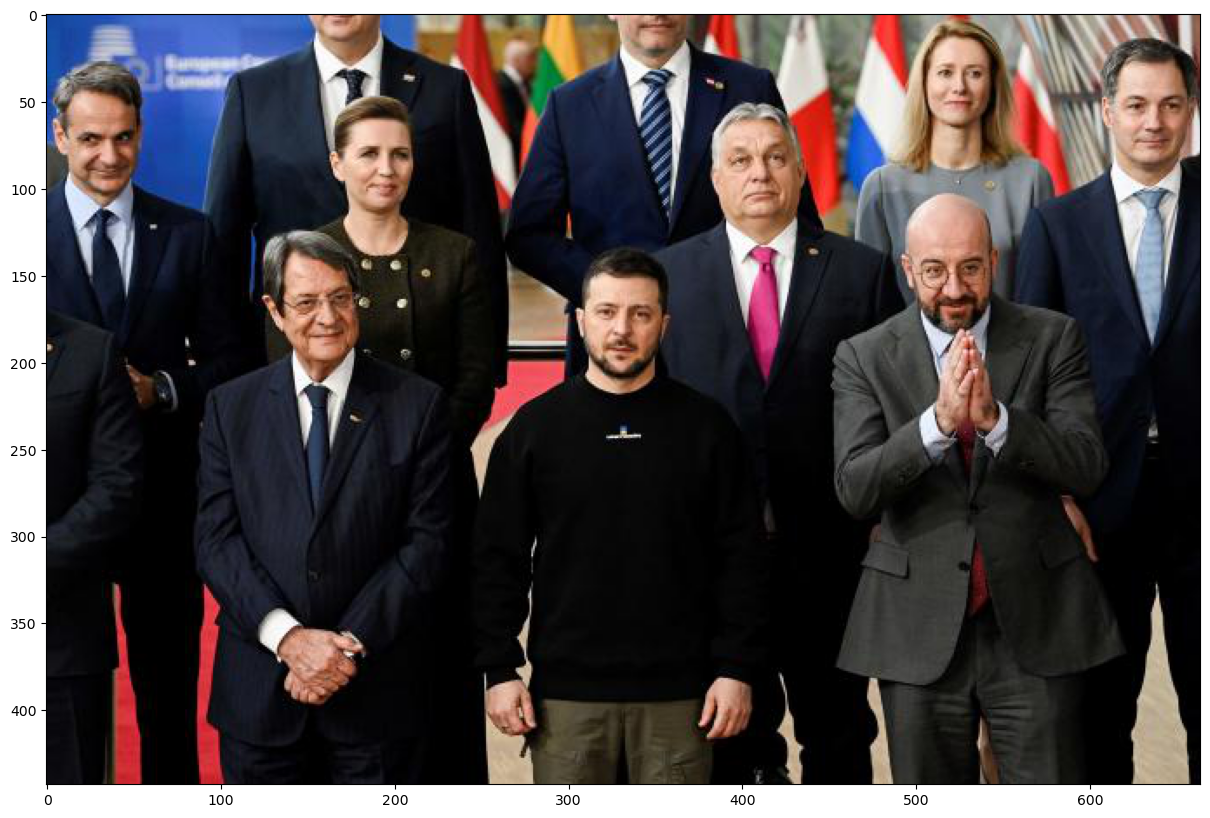

In [2]:
img = cv2.imread('../data/eu_summit.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [3]:
detector = dlib.get_frontal_face_detector()

### Step 3

Run the predictor on your image.

In [4]:
rects = detector(gray, 1)

### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

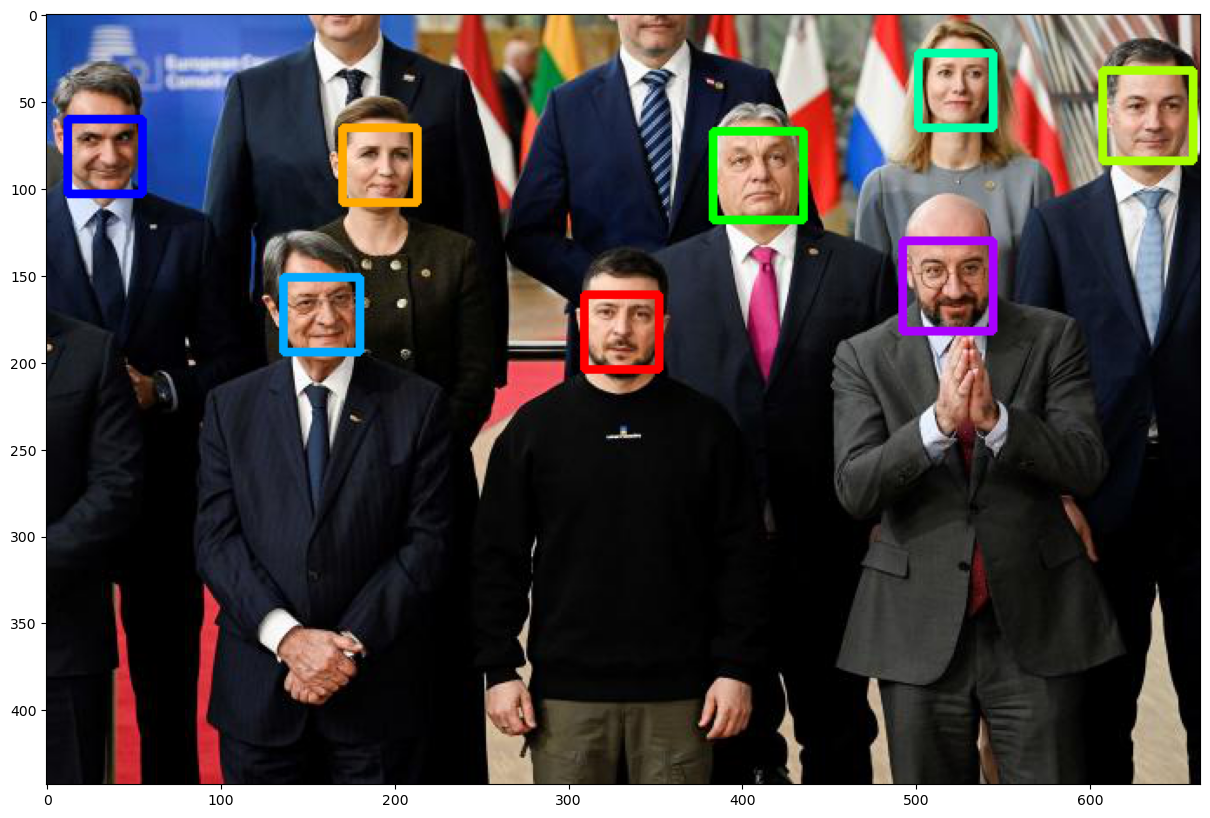

In [6]:
# Using HSV colorspace to select N visually distinct colors
def getDistinctColors(n):
    def HSVToRGB(h, s, v): 
        (r, g, b) = colorsys.hsv_to_rgb(h, s, v) 
        return (int(255*r), int(255*g), int(255*b)) 
        
    huePartition = 1.0 / (n + 1) 
    return [HSVToRGB(huePartition * value, 1.0, 1.0) for value in range(0, n)]

def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)


def draw_rectangles(img, rects): 
    # Draw rectangle around each face
    result_dlib = np.copy(img)
    faces_dlib_img = []
    colors = getDistinctColors(len(rects))
    for i, rect in enumerate(rects):    
        # Draw rectangle around the face
        x, y, w, h = rect_to_bb(rect)
        cv2.rectangle(result_dlib, (x, y), (x+w, y+h), colors[i], 3)
        faces_dlib_img.append(img[y:y+h, x:x+w, :])
    plt.imshow(result_dlib)

draw_rectangles(img, rects)

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

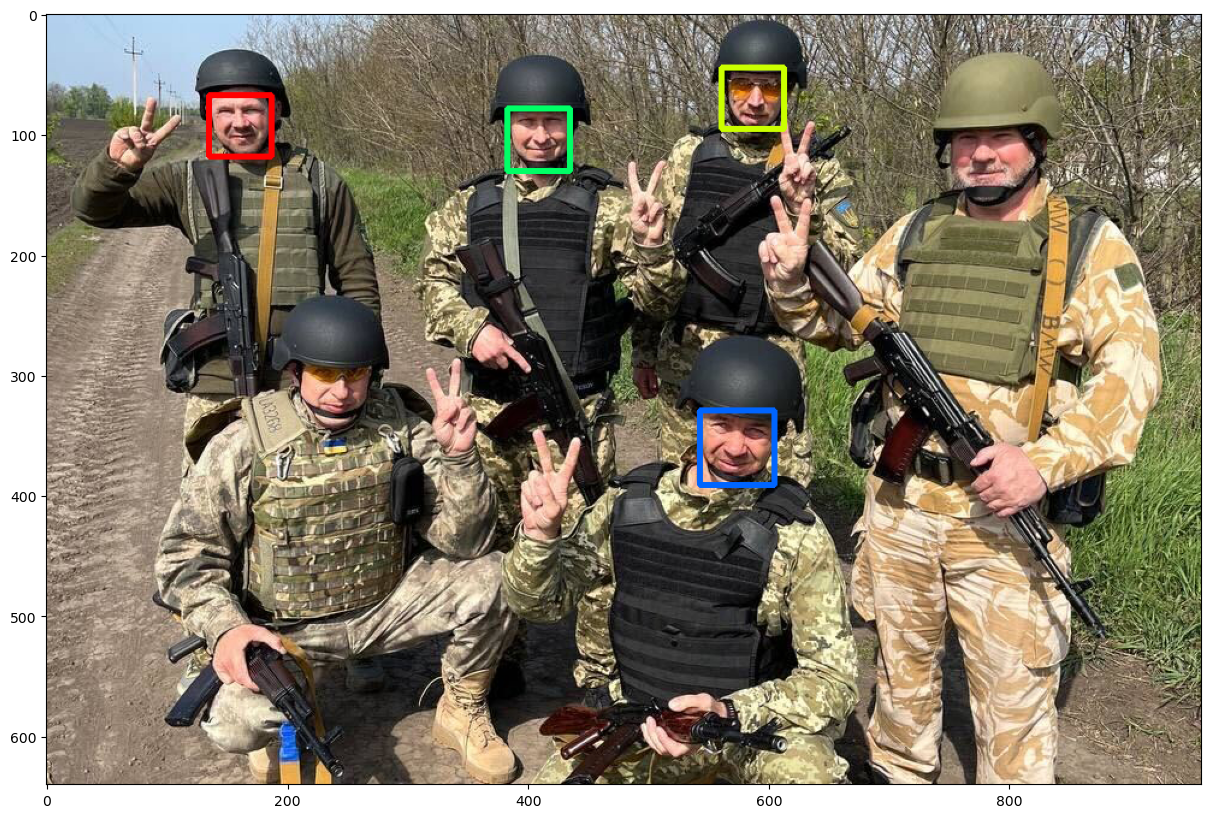

In [24]:
img2 = cv2.imread('../data/soldiers.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
detector = dlib.get_frontal_face_detector()
rects2 = detector(gray2, 1)
draw_rectangles(img2, rects2)

Detector is not robust
It does not detect faces which are particularly covered or not looking into camera